In [180]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import math

C:\Users\bttobi\AppData\Local\Temp/ipykernel_15352/4115882633.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img/{img}.png') #wczytywanie obrazka


First entropy:  7.26923263594332
Second entropy:  -7.965855631067617


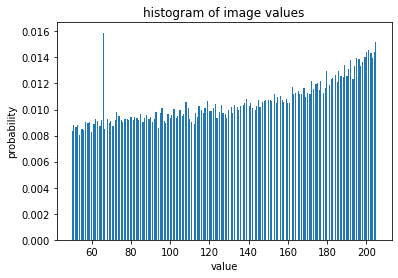

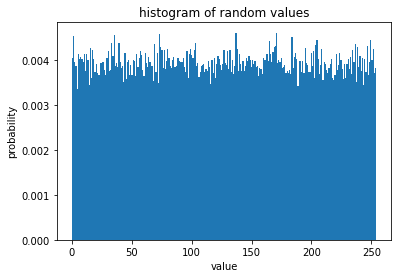

In [181]:
def rgb2gray(rgb): #funkcja ze stackoverflow na zmiane na grayscale - madrzejsi ludzie
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

file = open('output.txt', 'w') #otwieranie pliku

for img in range(0, 10):
    image = imageio.imread(f'img/{img}.png') #wczytywanie obrazka
    image = rgb2gray(image) # przerabianie obrazka na grayscale

    threshold = 50
    tempBuffer = []

    for x in range(len(image)): #wczytywanie wiersza
        for y in range(len(image[0])): #wczytywanie kolumny
            if (image[x][y] < 0xff - threshold) and (image[x][y] > threshold):
                tempBuffer.append(int(image[x][y]) ^ x ^ y)


    loop = int(len(tempBuffer)/2)
    randomNumberBuffer = []

    for i in range(0, loop):
        randomNumberBuffer.append(tempBuffer[i*2])
        randomNumberBuffer[i] = ((randomNumberBuffer[i]<<4) | (int(tempBuffer[2*i+1]) & 0x0f))
        randomNumberBuffer[i] = randomNumberBuffer[i] & 0xFF;
        file.write(format(randomNumberBuffer[i], '08b'))

file.close()

file = open('output.txt', 'r') #otwieranie pliku
buffer = []

while True:
    eightBit = str(file.read(8))
    if not eightBit:
        break
    eightBit = int(eightBit, 2) 
    buffer.append(eightBit)

file.close()

ent1 = 0;
ent2 = 0;

image = list(map(int, image.ravel().tolist()))

prob = sum(1 for i in image if i >= 50 and i <= 205)

for i in range(50, 206):
    ent1 += -(image.count(i)/prob)*math.log2(image.count(i)/prob)

for i in range(0,  255):
    ent2 += -(randomNumberBuffer.count(i)/len(randomNumberBuffer) *math.log2(randomNumberBuffer.count(i)/len(randomNumberBuffer)))

print("First entropy: ", ent1)
print("Second entropy: ", ent2)

plt.hist(image,255,[50,205], density=True)
plt.title('histogram of image values')
plt.xlabel('value')
plt.ylabel('probability')
plt.show()

plt.hist(randomNumberBuffer,255,[0,254], density=True)
plt.title('histogram of random values')
plt.xlabel('value')
plt.ylabel('probability')
plt.show()
